## Heart Attack Risk Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("framingham.csv")

In [4]:
data.shape

(4240, 16)

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Exploratory Data Analysis

#### Missing Data Variable

In [6]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.21%


In [7]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


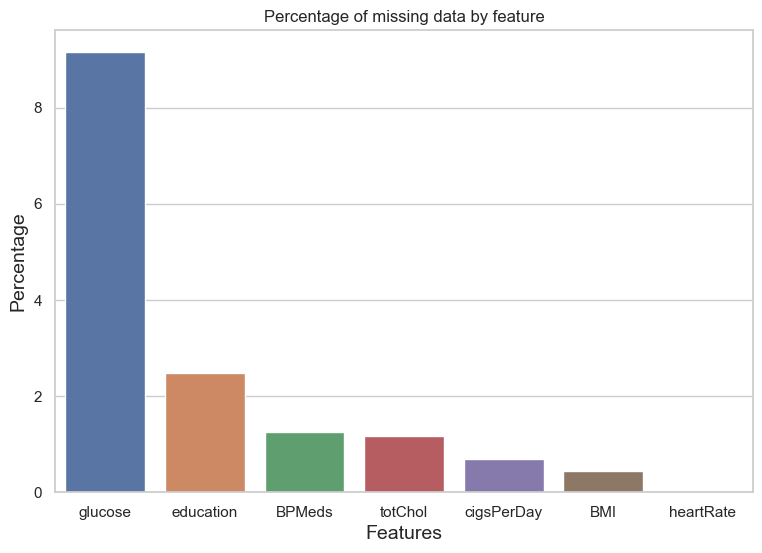

In [8]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [9]:
# data['education'] = data['education'].fillna(method='ffill')
# data['education']

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.shape

(3658, 16)

#### Data Distribution

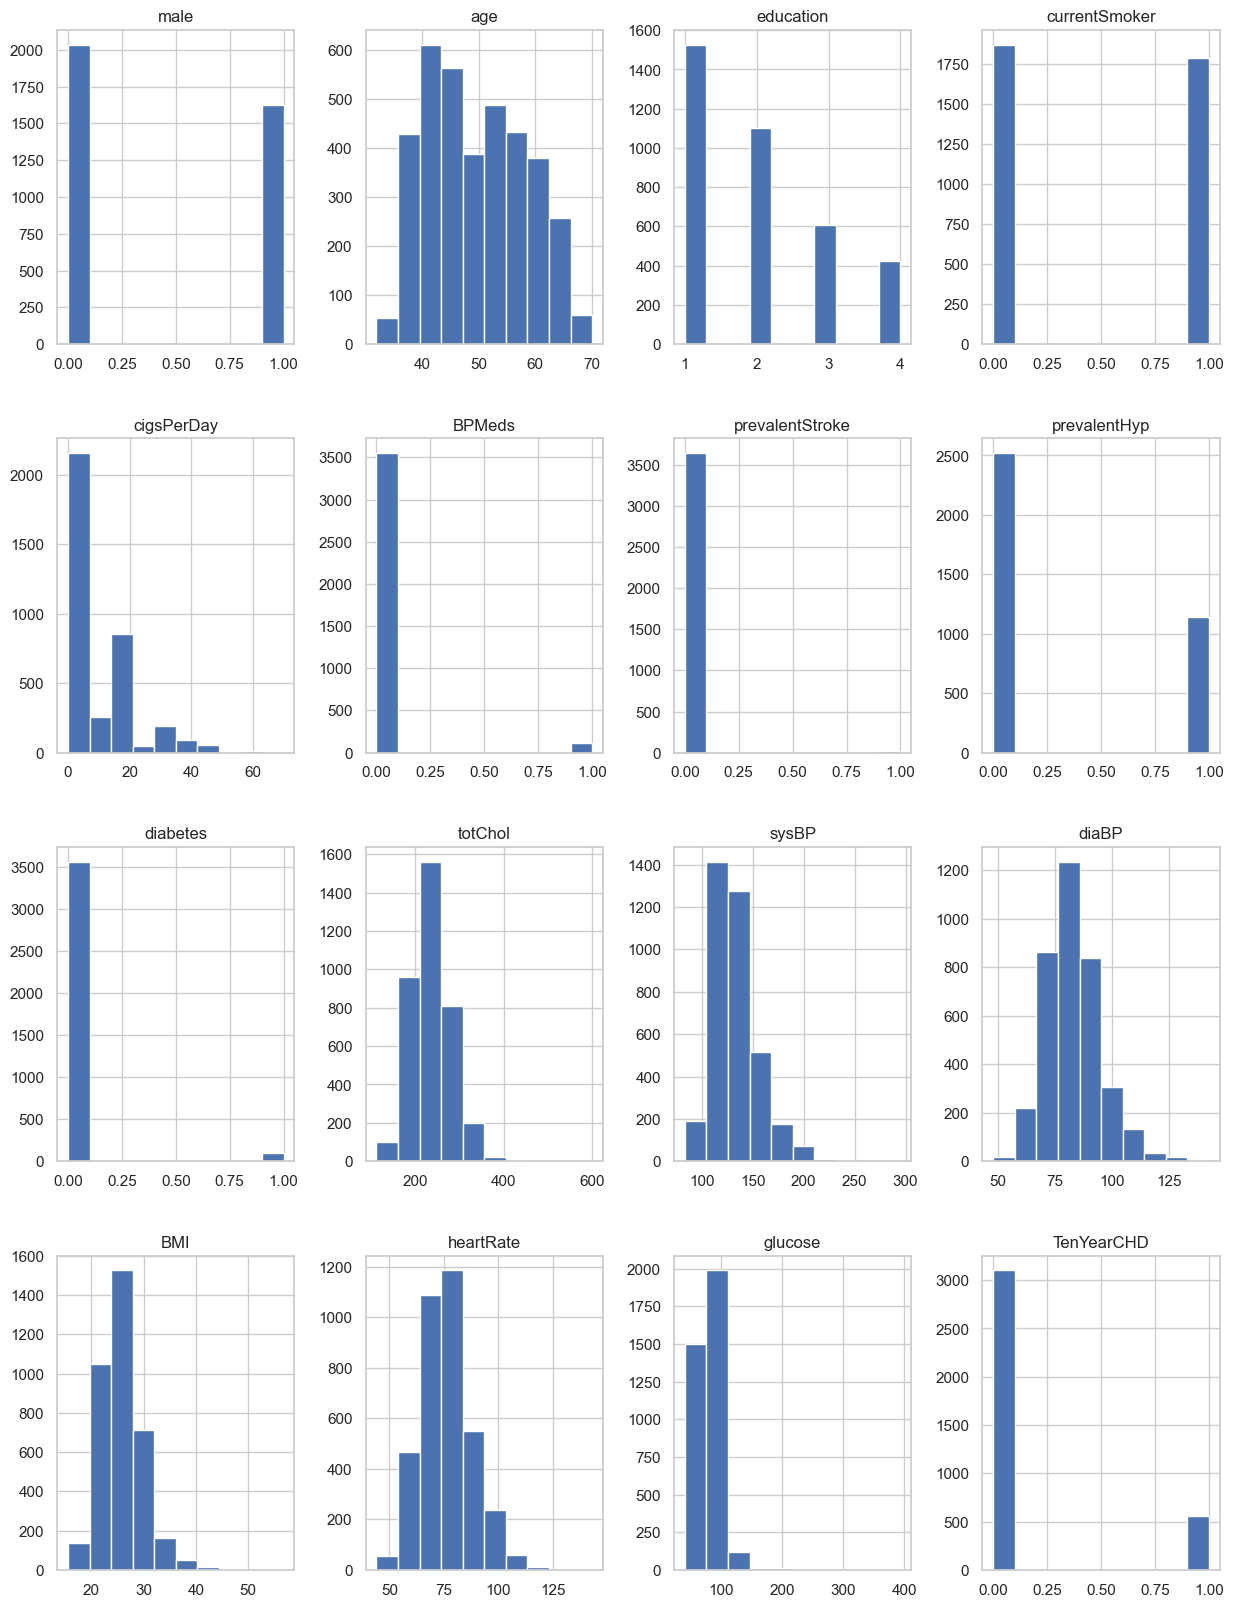

In [12]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

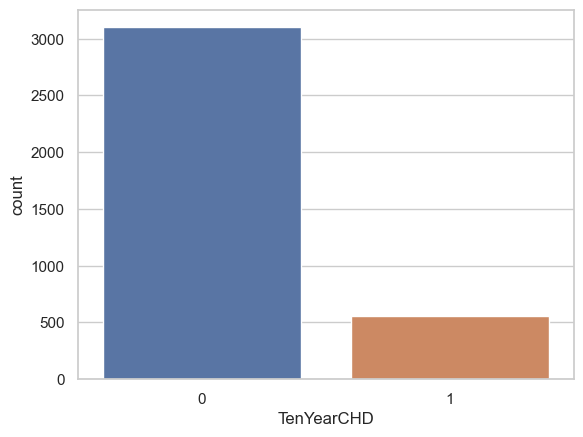

There are 3101 patients without heart disease and 557 patients with the disease


In [13]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

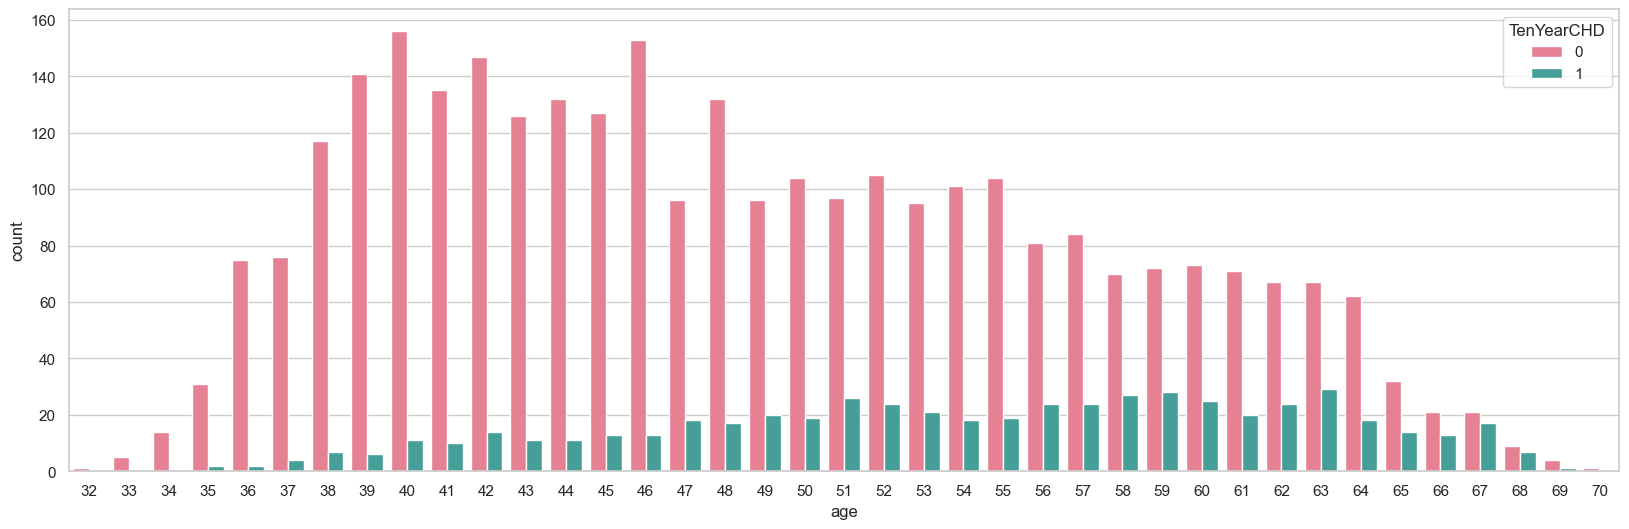

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

### Correlation of HeatMap

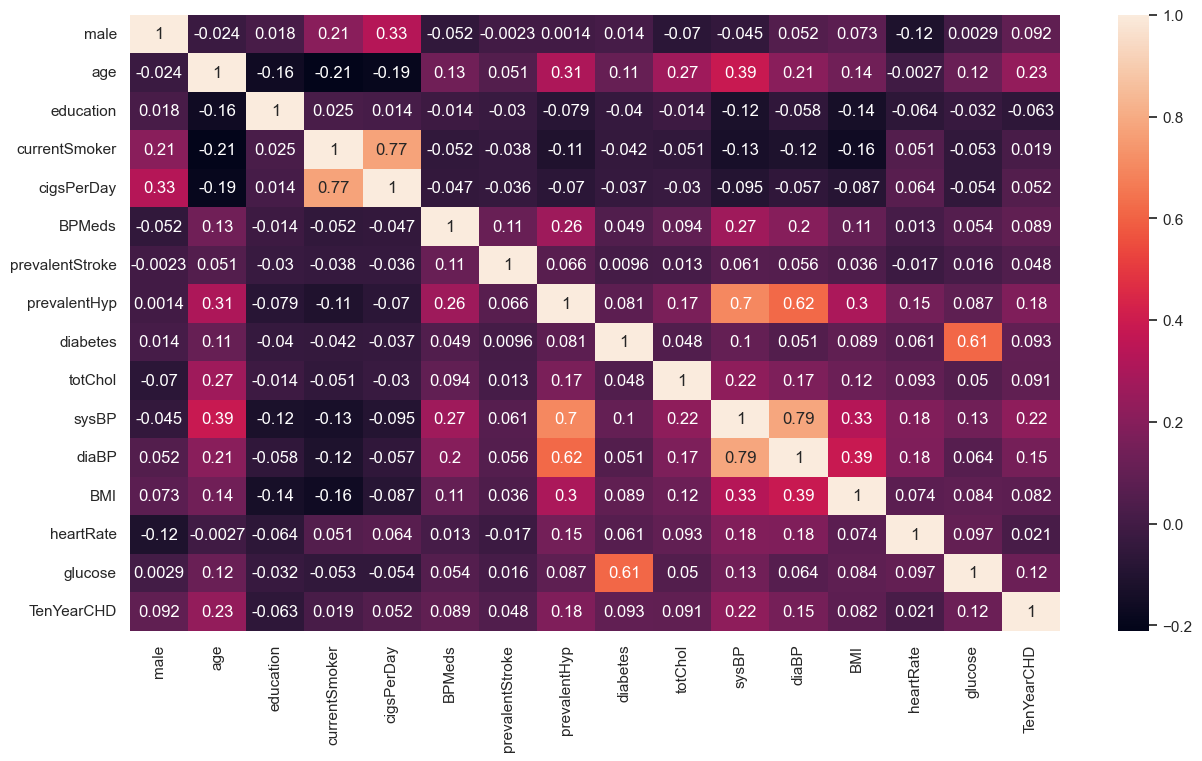

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

### Feature Selection

#### BorutaPy

In [16]:
x = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

In [17]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)

In [19]:
# Initialize a Random Forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', 
                            max_depth=5, random_state=42)


In [20]:
# Initialize Boruta feature selection method
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

In [21]:
# Fit Boruta
boruta_selector.fit(X_train.values, y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=80, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2962B761540),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2962B761540, verbose=2)

In [22]:
selected_features = X_train.columns[boruta_selector.support_].to_list()

In [23]:
# Print the selected features
print(f"Selected Features: {selected_features}")

Selected Features: ['age', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']


### Model and Predictions

In [24]:
x1 = data[['age', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']]
y1 = data['TenYearCHD']

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, 
                                                    random_state=42)

In [27]:
# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Calculate the accuracy of the model
nb_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {nb_accuracy:.2f}')

Accuracy: 0.81


In [30]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       922
           1       0.40      0.31      0.35       176

    accuracy                           0.81      1098
   macro avg       0.64      0.61      0.62      1098
weighted avg       0.80      0.81      0.80      1098



<Figure size 800x600 with 0 Axes>

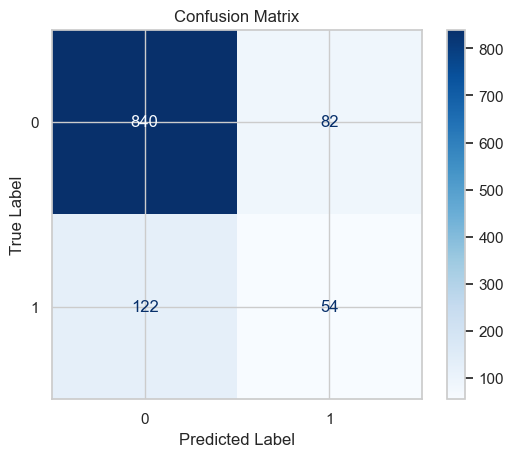

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [32]:
# Perform cross-validation
cv_scores = cross_val_score(model, x1, y1, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy: 0.81


#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, 
                                                    random_state=42)

In [35]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators and other hyperparameters
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [38]:
# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rf_accuracy:.2f}')

Accuracy: 0.84


In [39]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       922
           1       0.65      0.06      0.11       176

    accuracy                           0.84      1098
   macro avg       0.75      0.53      0.51      1098
weighted avg       0.82      0.84      0.79      1098



In [40]:
# Perform cross-validation
cv_scores = cross_val_score(model, x1, y1, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy: 0.84


#### Artificial Neural Network

In [41]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, 
                                                    random_state=42)

In [43]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Define the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [45]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7410 - loss: 0.5942 - val_accuracy: 0.8574 - val_loss: 0.4199
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.4192 - val_accuracy: 0.8574 - val_loss: 0.3999
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.3900 - val_accuracy: 0.8574 - val_loss: 0.3981
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8389 - loss: 0.3955 - val_accuracy: 0.8555 - val_loss: 0.3957
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3729 - val_accuracy: 0.8555 - val_loss: 0.3966
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.3922 - val_accuracy: 0.8555 - val_loss: 0.3957
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.3749 - val_accuracy: 0.8555 - val_loss: 0.3970
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.3826 - val_accuracy: 0.8535 - val_loss:

In [47]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [48]:
# Calculate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {ann_accuracy:.2f}')

Accuracy: 0.84


In [49]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       922
           1       0.53      0.10      0.16       176

    accuracy                           0.84      1098
   macro avg       0.69      0.54      0.54      1098
weighted avg       0.80      0.84      0.79      1098



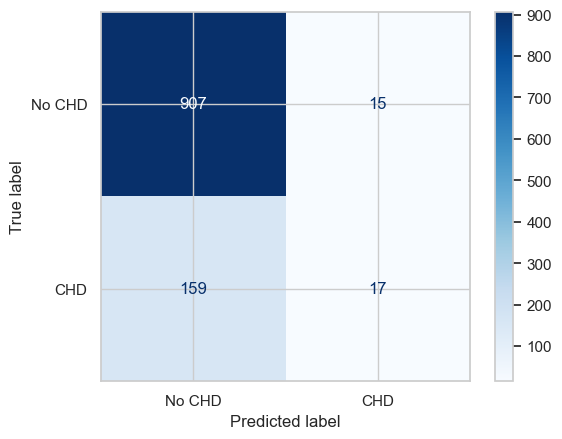

In [50]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No CHD', 'CHD'])
# Plot confusion matrix
cm_display.plot(cmap='Blues')

In [51]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       922
           1       0.53      0.10      0.16       176

    accuracy                           0.84      1098
   macro avg       0.69      0.54      0.54      1098
weighted avg       0.80      0.84      0.79      1098



#### Support Vector Machine (SVM)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, 
                                                    random_state=42)

In [54]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Initialize and train the Support Vector Machine model
model = SVC(kernel='linear', random_state=42)  # You can also try 'rbf', 'poly', etc.
model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [57]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [58]:
# Calculate the accuracy of the model
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {svm_accuracy:.2f}')

Accuracy: 0.84


In [59]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.00      0.00      0.00       176

    accuracy                           0.84      1098
   macro avg       0.42      0.50      0.46      1098
weighted avg       0.71      0.84      0.77      1098



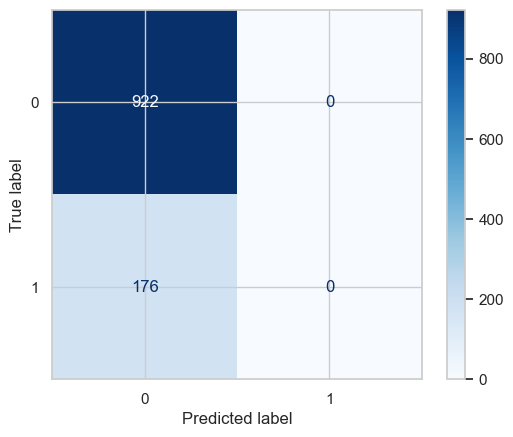

In [60]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [62]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [63]:
# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [64]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best Score: 0.851171875
